# Pytorch Test Datasets and Dataloaders
Notebook for testing pytorch datasets and dataloaders, using [Pytorch](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) website tutorial.<br>
[Main code](#Main-Code).

### Choices for data

<br>

### Libaries and Modules
Importing the necessary libaries and modules for the notebook.

In [1]:
#Import cell
import matplotlib.dates as mdates
import matplotlib as mpl 
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import pickle as pk
import matplotlib.ticker as ticker
import torch

from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision.io import read_image
from torch.utils.data import DataLoader

print("Imports complete")

Imports complete


<br>

### Importing data sets
Importing the data for the models.

In [2]:
#Importing data sets
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=False,
    transform=ToTensor()
)


test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=False,
    transform=ToTensor()
)
print("Data sets successfully imported.")

Data sets successfully imported.


In [3]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

<br>

### Calculation functions
<b>Functions:</b><br>
<ul>
<li>
</ul>

In [4]:
#Calculation functions cell


print("Calculation functions defined.")

Calculation functions defined.


<br>

### Plotting functions
<b>Functions:</b>
<ul>
<li> 
</ul>

In [5]:
#Plotting functions Cell


print("Plotting functions defined.")

Plotting functions defined.


<br>

### Main Code

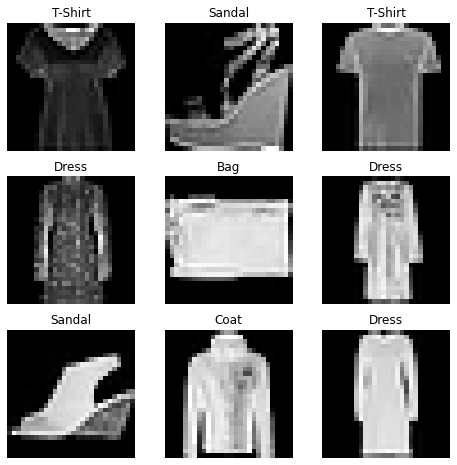

In [6]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser", 
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal", 
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3

for i in range(1, cols*rows + 1):
    sample_idx = torch.randint(len(training_data), size = (1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

<br>

### Cusom Data Set

In [7]:
class CustomImagedataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self. transform = transform
        self. target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(image_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

<br>

### DataLoaders

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


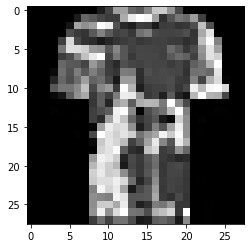

Label: 0, T-Shirt


In [8]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}, {labels_map[label.item()]}")

<br>